In [334]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

In [335]:
words  = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [336]:
len(words)

32033

In [337]:
# build the vocabulary of chars and mapping sto/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [338]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [339]:
X.shape, Y.shape, X.type(), Y.type()

(torch.Size([228146, 3]),
 torch.Size([228146]),
 'torch.LongTensor',
 'torch.LongTensor')

In [429]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [340]:
C = torch.randn(27, 2)

In [341]:
C[5]

tensor([ 0.6877, -0.5768])

In [342]:
emb = C[X]
C[X]

tensor([[[-0.6651, -0.0471],
         [-0.6651, -0.0471],
         [-0.6651, -0.0471]],

        [[-0.6651, -0.0471],
         [-0.6651, -0.0471],
         [ 0.6877, -0.5768]],

        [[-0.6651, -0.0471],
         [ 0.6877, -0.5768],
         [-0.9917, -0.2819]],

        ...,

        [[-0.6126, -0.4223],
         [-0.6126, -0.4223],
         [-0.5445,  1.6278]],

        [[-0.6126, -0.4223],
         [-0.5445,  1.6278],
         [-0.6126, -0.4223]],

        [[-0.5445,  1.6278],
         [-0.6126, -0.4223],
         [-1.0980, -0.0216]]])

In [343]:
C[X].shape

torch.Size([228146, 3, 2])

In [344]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [345]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [346]:
h

tensor([[-0.8516, -0.0054, -0.8009,  ..., -0.8188, -0.1791, -0.8730],
        [ 0.5540, -0.8661,  0.6957,  ..., -0.0781,  0.6756, -0.9927],
        [-0.9743, -0.3533, -0.9683,  ..., -0.8032,  0.9617,  0.7910],
        ...,
        [-0.4634,  0.2440, -0.5361,  ..., -0.1083, -0.9983, -0.9914],
        [-0.9988, -0.3788, -0.9879,  ..., -0.9099,  0.9954, -0.5061],
        [-0.9265,  0.0245,  0.5850,  ..., -0.8517, -0.8227, -0.1726]])

In [347]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [348]:
logits = h @ W2 + b2

In [349]:
logits

tensor([[ -7.9340,  -1.7866, -11.9573,  ...,  -1.0897,  19.0576,  -1.3447],
        [  0.2959,  -0.5297,  -5.2340,  ...,  -5.7564,  22.5332,   6.3904],
        [-11.7348,   3.2294,  -2.4421,  ...,   7.5679,  -0.3661,  -0.7001],
        ...,
        [ -5.3322, -10.7949, -14.6683,  ...,  -6.8483,   8.4702,  -7.5551],
        [  3.0583,  14.5629,  -9.7984,  ...,   4.0480,  16.1935,  -4.5822],
        [ -9.5004,  -8.8455,   0.9531,  ...,  -1.0901,  11.5154,  -5.1437]])

In [350]:
counts = logits.exp()

In [351]:
prob = counts / counts.sum(1, keepdim=True)

In [352]:
prob.shape

torch.Size([228146, 27])

In [353]:
prob

tensor([[1.8946e-12, 8.8569e-10, 3.3900e-14,  ..., 1.7780e-09, 9.9961e-01,
         1.3778e-09],
        [2.1993e-10, 9.6318e-11, 8.7230e-13,  ..., 5.1735e-13, 9.9952e-01,
         9.7509e-08],
        [4.1552e-13, 1.3105e-06, 4.5119e-09,  ..., 1.0038e-04, 3.5969e-08,
         2.5757e-08],
        ...,
        [1.3154e-08, 5.5798e-11, 1.1599e-12,  ..., 2.8879e-09, 1.2983e-02,
         1.4245e-09],
        [6.6500e-07, 6.5949e-02, 1.7348e-12,  ..., 1.7892e-06, 3.3682e-01,
         3.1960e-10],
        [2.1515e-11, 4.1413e-11, 7.4586e-07,  ..., 9.6664e-08, 2.8825e-02,
         1.6782e-09]])

In [354]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [430]:
# ------------ now made respectable :) ---------------

In [468]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [525]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn(27, 10, generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [526]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [527]:
for p in parameters:
    p.requires_grad = True

In [528]:
C.shape, X.shape
#C[X].shape

(torch.Size([27, 10]), torch.Size([228146, 3]))

In [529]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [530]:
lri = []
lossi = []
stepi = []

In [531]:
for i in range(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    #forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = (h @ W2) + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
#    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
#    lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    
    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.3828699588775635


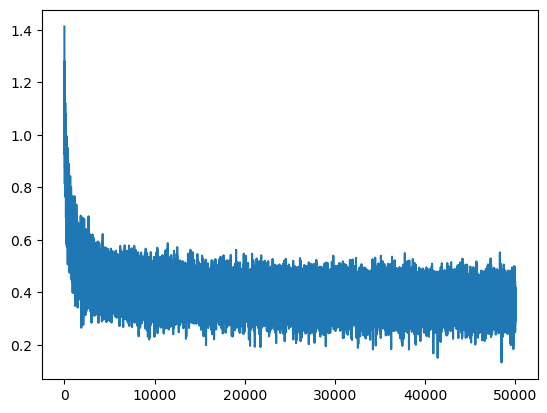

In [532]:
plt.plot(stepi, lossi)

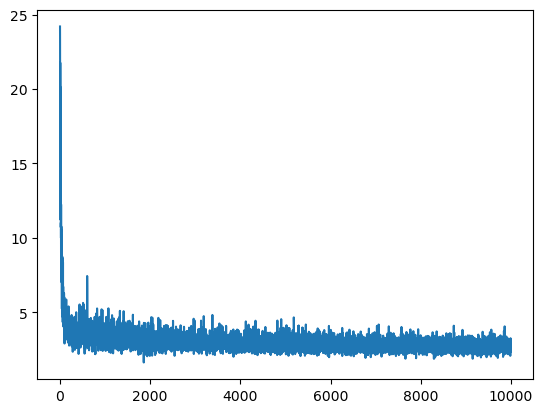

In [515]:
plt.plot(stepi, lossi)

In [533]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3513, grad_fn=<NllLossBackward0>)

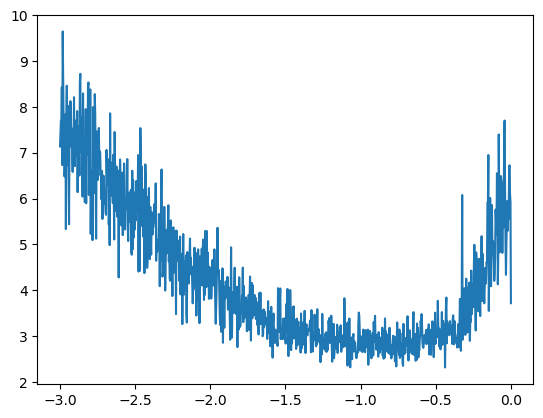

In [400]:
plt.plot(lri, lossi)

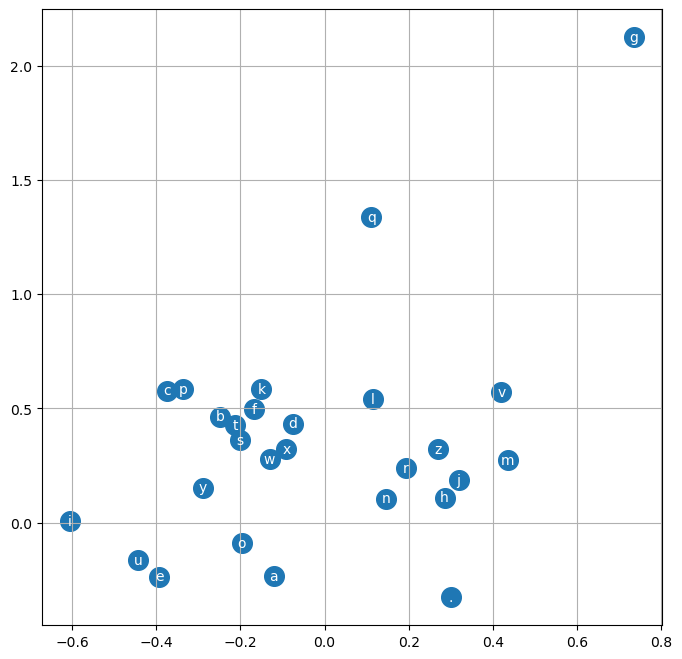

In [524]:


# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [536]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

eria.
gryannieel.
nohahlla.
everslendra.
graderedorlina.
milopaleigh.
van.
aar.
gatzion.
karin.
shravondhianne.
giceonnellennteromi.
brence.
ryylena.
elsyn.
aje.
stelan.
hil.
aadylisun.
zakeloranni.
